In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt

# London Crime Clustering
The purpose of this notebook is to examine the case of clusters of certain types of crime in London and to also advance my understanding of hierarchical clustering.

## Hierarchical clustering
![hierarchial-clustering](https://raw.githubusercontent.com/PhilipDW183/London_crime_clusters/85b994bc075ec49f1c874ed199e2c2008f5ba3da/Img/Hierarchical_Clus_den.png)

In [2]:
crime = pd.read_csv('archives/2021-10/london-most-recent-24-months-crimes.csv')

In [3]:
crime.head(10)

,LSOA Code,LSOA Name,Borough,Major Category,Minor Category,201912,202001,202002,202003,202004,...,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111
0,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Arson and Criminal Damage,Arson,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Arson and Criminal Damage,Criminal Damage,0,3,0,0,0,...,1,0,0,1,1,0,0,0,0,0
2,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Burglary,Burglary - Business and Community,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Burglary,Burglary - Residential,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Drug Offences,Drug Trafficking,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Drug Offences,Possession of Drugs,0,1,3,0,3,...,2,3,1,0,0,0,1,2,1,3
6,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Miscellaneous Crimes Against Society,"Making, Supplying or Possessing Articles for u...",0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Miscellaneous Crimes Against Society,Obscene Publications,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Miscellaneous Crimes Against Society,Perverting Course of Justice,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,E01000006,Barking and Dagenham 016A,Barking and Dagenham,Miscellaneous Crimes Against Society,Possession of False Documents,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
crime.tail(10)

,LSOA Code,LSOA Name,Borough,Major Category,Minor Category,201912,202001,202002,202003,202004,...,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111
103167,E01033746,Greenwich 038E,Greenwich,Robbery,Robbery of Business Property,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103168,E01033746,Greenwich 038E,Greenwich,Robbery,Robbery of Personal Property,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
103169,E01033746,Greenwich 038E,Greenwich,Theft,Bicycle Theft,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
103170,E01033746,Greenwich 038E,Greenwich,Theft,Other Theft,0,1,2,1,0,...,0,0,0,1,0,0,1,0,0,0
103171,E01033746,Greenwich 038E,Greenwich,Theft,Theft from Person,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
103172,E01033746,Greenwich 038E,Greenwich,Vehicle Offences,Interfering with a Motor Vehicle,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103173,E01033746,Greenwich 038E,Greenwich,Vehicle Offences,Theft from a Motor Vehicle,0,0,0,0,0,...,1,0,1,1,2,1,0,1,0,0
103174,E01033746,Greenwich 038E,Greenwich,Vehicle Offences,Theft or Taking of a Motor Vehicle,2,0,0,0,0,...,0,1,0,1,0,2,0,0,0,0
103175,E01033746,Greenwich 038E,Greenwich,Violence Against the Person,Violence with Injury,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
103176,E01033746,Greenwich 038E,Greenwich,Violence Against the Person,Violence without Injury,1,0,1,1,2,...,0,1,1,0,3,0,2,0,1,2


In [5]:
crime.describe()

,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009,...,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111
count,103177.000000,103177.000000,103177.000000,103177.000000,103177.000000,103177.000000,103177.000000,103177.000000,103177.000000,103177.000000,...,103177.000000,103177.000000,103177.000000,103177.000000,103177.000000,103177.000000,103177.000000,103177.000000,103177.000000,103177.000000
mean,0.700398,0.713299,0.682187,0.612675,0.457030,0.536428,0.581108,0.657937,0.659343,0.664974,...,0.485496,0.573422,0.567685,0.620923,0.639842,0.652180,0.613160,0.634783,0.685453,0.660312
std,3.025528,2.607445,2.875073,2.000495,1.073769,1.224631,1.332633,1.667354,1.808858,1.795892,...,1.150650,1.292263,1.425074,1.731479,1.817422,2.027661,1.908469,1.956424,2.558863,2.446355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,366.000000,245.000000,273.000000,196.000000,60.000000,67.000000,72.000000,104.000000,142.000000,127.000000,...,39.000000,40.000000,88.000000,164.000000,156.000000,163.000000,149.000000,182.000000,266.000000,305.000000


In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103177 entries, 0 to 103176
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   LSOA Code       103177 non-null  object
 1   LSOA Name       103177 non-null  object
 2   Borough         103177 non-null  object
 3   Major Category  103177 non-null  object
 4   Minor Category  103177 non-null  object
 5   201912          103177 non-null  int64 
 6   202001          103177 non-null  int64 
 7   202002          103177 non-null  int64 
 8   202003          103177 non-null  int64 
 9   202004          103177 non-null  int64 
 10  202005          103177 non-null  int64 
 11  202006          103177 non-null  int64 
 12  202007          103177 non-null  int64 
 13  202008          103177 non-null  int64 
 14  202009          103177 non-null  int64 
 15  202010          103177 non-null  int64 
 16  202011          103177 non-null  int64 
 17  202012          103177 non-nu

In [7]:
# we can firstly extract the unique values to see what they are:
major_categories = crime["Major Category"].unique()
minor_categories = crime["Minor Category"].unique()

print(major_categories)
print(minor_categories)

['Arson and Criminal Damage' 'Burglary' 'Drug Offences'
 'Miscellaneous Crimes Against Society' 'Possession of Weapons'
 'Public Order Offences' 'Robbery' 'Theft' 'Vehicle Offences'
 'Violence Against the Person']
['Arson' 'Criminal Damage' 'Burglary - Business and Community'
 'Burglary - Residential' 'Drug Trafficking' 'Possession of Drugs'
 'Making, Supplying or Possessing Articles for use i'
 'Obscene Publications' 'Perverting Course of Justice'
 'Possession of False Documents'
 'Possession of Article with Blade or Point'
 'Other Offences Against the State, or Public Order'
 'Public Fear Alarm or Distress'
 'Racially or Religiously Aggravated Public Fear, Al'
 'Robbery of Personal Property' 'Other Theft' 'Theft from Person'
 'Interfering with a Motor Vehicle' 'Theft from a Motor Vehicle'
 'Theft or Taking of a Motor Vehicle' 'Violence with Injury'
 'Violence without Injury' 'Dangerous Driving'
 'Fraud or Forgery Associated with Driver Records' 'Handling Stolen Goods'
 'Other Forgery

In [8]:
# we can then see how they group i.e. are minor crime specific subsets or are they seperate groups
crime_type = crime.groupby(["Major Category", "Minor Category"]).agg({"LSOA Code": "count"})
crime_type

LSOA Code
Major Category                       Minor Category                                               
Arson and Criminal Damage            Arson                                                    1953
                                     Criminal Damage                                          4827
Burglary                             Burglary - Business and Community                        3997
                                     Burglary - Residential                                   4829
Drug Offences                        Drug Trafficking                                         3227
                                     Possession of Drugs                                      4756
Miscellaneous Crimes Against Society Absconding from Lawful Custody                             51
                                     Aiding Suicide                                              2
                                     Bail Offences                                              60
                                     Bigamy                                                     26
                                     Dangerous Driving                                         708
                                     Disclosure, Obstruction, False or Misleading State         62
                                     Exploitation of Prostitution                               36
                                     Forgery or Use of Drug Prescription                        97
                                     Fraud or Forgery Associated with Driver Records           127
                                     Going Equipped for Stealing                               652
                                     Handling Stolen Goods                                     880
                                     Making, Supplying or Possessing Articles for use i        588
                                     Obscene Publications                                     3022
                                     Offender Management Act                                    27
                                     Other Forgery                                             832
                                     Other Notifiable Offences                                1264
                                     Perjury                                                    13
                                     Perverting Course of Justice                              879
                                     Possession of False Documents                             343
                                     Profitting From or Concealing Proceeds of Crime           845
                                     Soliciting for Prostitution                                29
                                     Threat or Possession With Intent to Commit Crimina       2646
                                     Wildlife Crime                                              7
Possession of Weapons                Other Firearm Offences                                    165
                                     Other Knife Offences                                        4
                                     Possession of Article with Blade or Point                2564
                                     Possession of Firearm with Intent                         483
                                     Possession of Firearms Offences                           823
                                     Possession of Other Weapon                               2464
Public Order Offences                Other Offences Against the State, or Public Order        3701
                                     Public Fear Alarm or Distress                            4792
                                     Racially or Religiously Aggravated Public Fear, Al       4163
                                     Violent Disorder                                          101
Robbery                       

In [9]:
cols_to_sum_19 = [col for col in crime.columns if "2019" in str(col)]
cols_to_sum_20 = [col for col in crime.columns if "2020" in str(col)]
cols_to_sum_21 = [col for col in crime.columns if "2021" in str(col)]

crime["2019"] = crime[cols_to_sum_19].sum(axis=1)
crime["2020"] = crime[cols_to_sum_20].sum(axis=1)
crime["2021"] = crime[cols_to_sum_21].sum(axis=1)

In [10]:
crime = crime[["LSOA Code", "Major Category", "2019", "2020", "2021"]]
crime

,LSOA Code,Major Category,2019,2020,2021
0,E01000006,Arson and Criminal Damage,0,2,0
1,E01000006,Arson and Criminal Damage,0,4,4
2,E01000006,Burglary,0,0,1
3,E01000006,Burglary,2,5,3
4,E01000006,Drug Offences,0,1,1
...,...,...,...,...,...
103172,E01033746,Vehicle Offences,0,2,0
103173,E01033746,Vehicle Offences,0,11,8
103174,E01033746,Vehicle Offences,2,4,4
103175,E01033746,Violence Against the Person,0,4,3


In [11]:
crime[crime["LSOA Code"] == "E01000006"]

,LSOA Code,Major Category,2019,2020,2021
0,E01000006,Arson and Criminal Damage,0,2,0
1,E01000006,Arson and Criminal Damage,0,4,4
2,E01000006,Burglary,0,0,1
3,E01000006,Burglary,2,5,3
4,E01000006,Drug Offences,0,1,1
5,E01000006,Drug Offences,0,24,13
6,E01000006,Miscellaneous Crimes Against Society,0,0,1
7,E01000006,Miscellaneous Crimes Against Society,0,1,0
8,E01000006,Miscellaneous Crimes Against Society,0,0,1
9,E01000006,Miscellaneous Crimes Against Society,0,0,1


In [12]:
# drop the 2019 and 2020 column but do so iin creating a new 2021 labelled dataframe
crime_2021 = crime.drop(columns=["2019", "2020"]).copy()

In [13]:
# use the pivot table function, set index to LSOA, column names to be the major categories, and values from the 2021 column
# we want to agg by the sum, and we want to fill any empty values with a zero
crime_2021 = crime_2021.pivot_table(index='LSOA Code', columns='Major Category',
                                    values="2021", aggfunc=np.sum,
                                    fill_value=0).reset_index()
# then rename the axis
crime_2021.rename_axis(None, axis=1, inplace=True)

In [14]:
# extract the columns to sum
cols_to_sum = [col for col in crime_2021.columns if "LSOA" not in col]

# sum across the columns rather than rows
crime_2021["Total_crime"] = crime_2021[cols_to_sum].sum(axis=1)

In [15]:
# we then want to turn the previous columns into percentages
# do this by dividing over the total crime columns
for col in cols_to_sum:
    crime_2021[col] = crime_2021[col] / crime_2021["Total_crime"]

In [16]:
crime_2021

,LSOA Code,Arson and Criminal Damage,Burglary,Drug Offences,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Theft,Vehicle Offences,Violence Against the Person,Total_crime
0,E01000006,0.046512,0.046512,0.162791,0.034884,0.011628,0.058140,0.011628,0.116279,0.232558,0.279070,86
1,E01000007,0.048421,0.021053,0.206316,0.008421,0.025263,0.077895,0.065263,0.221053,0.035789,0.290526,475
2,E01000008,0.078341,0.050691,0.096774,0.009217,0.013825,0.032258,0.032258,0.198157,0.193548,0.294931,217
3,E01000009,0.069091,0.054545,0.149091,0.014545,0.007273,0.080000,0.072727,0.170909,0.061818,0.320000,275
4,E01000010,0.056999,0.025985,0.085499,0.002515,0.004191,0.067896,0.050293,0.446773,0.046102,0.213747,1193
...,...,...,...,...,...,...,...,...,...,...,...,...
4824,E01033742,0.041667,0.125000,0.062500,0.041667,0.000000,0.062500,0.000000,0.083333,0.125000,0.458333,48
4825,E01033743,0.070248,0.028926,0.033058,0.012397,0.008264,0.074380,0.004132,0.438017,0.078512,0.252066,242
4826,E01033744,0.120370,0.064815,0.046296,0.018519,0.018519,0.037037,0.009259,0.064815,0.120370,0.500000,108
4827,E01033745,0.078947,0.035088,0.043860,0.008772,0.017544,0.114035,0.026316,0.140351,0.175439,0.359649,114


In [17]:
crime_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4829 entries, 0 to 4828
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   LSOA Code                             4829 non-null   object 
 1   Arson and Criminal Damage             4829 non-null   float64
 2   Burglary                              4829 non-null   float64
 3   Drug Offences                         4829 non-null   float64
 4   Miscellaneous Crimes Against Society  4829 non-null   float64
 5   Possession of Weapons                 4829 non-null   float64
 6   Public Order Offences                 4829 non-null   float64
 7   Robbery                               4829 non-null   float64
 8   Theft                                 4829 non-null   float64
 9   Vehicle Offences                      4829 non-null   float64
 10  Violence Against the Person           4829 non-null   float64
 11  Total_crime      

In [18]:
crime_2021.describe()

,Arson and Criminal Damage,Burglary,Drug Offences,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Theft,Vehicle Offences,Violence Against the Person,Total_crime
count,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000
mean,0.076141,0.080569,0.054858,0.015401,0.007100,0.075436,0.024484,0.170925,0.167341,0.327746,141.520191
std,0.036718,0.046067,0.038714,0.017068,0.009474,0.035196,0.021476,0.107841,0.093790,0.096027,169.104389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040816,11.000000
25%,0.050898,0.048170,0.027523,0.003356,0.000000,0.051546,0.008929,0.095420,0.098039,0.260870,72.000000
50%,0.071429,0.071429,0.047887,0.012500,0.003774,0.073620,0.020942,0.142857,0.152174,0.326531,104.000000
75%,0.096154,0.102564,0.075472,0.021739,0.011628,0.096633,0.036036,0.219163,0.217949,0.391534,157.000000
max,0.306122,0.400000,0.492958,0.400000,0.083333,0.264368,0.204545,0.762397,0.684211,0.684932,4057.000000


In [19]:
# load in the LSOA map
UK_LSOA = gpd.read_file(
    "./layers/Lower_Layer_Super_Output_Areas_(December_2011)_Boundaries_Super_Generalised_Clipped_(BSC)_EW_V3-shp.zip")
# extract only the necessary information
UK_LSOA = UK_LSOA[["LSOA11CD", "geometry"]]

In [20]:
#merge the crime data with the LSOA file to create the London-crime dataframe
London_crime = UK_LSOA.merge(crime_2021, left_on="LSOA11CD", right_on="LSOA Code", how="right")

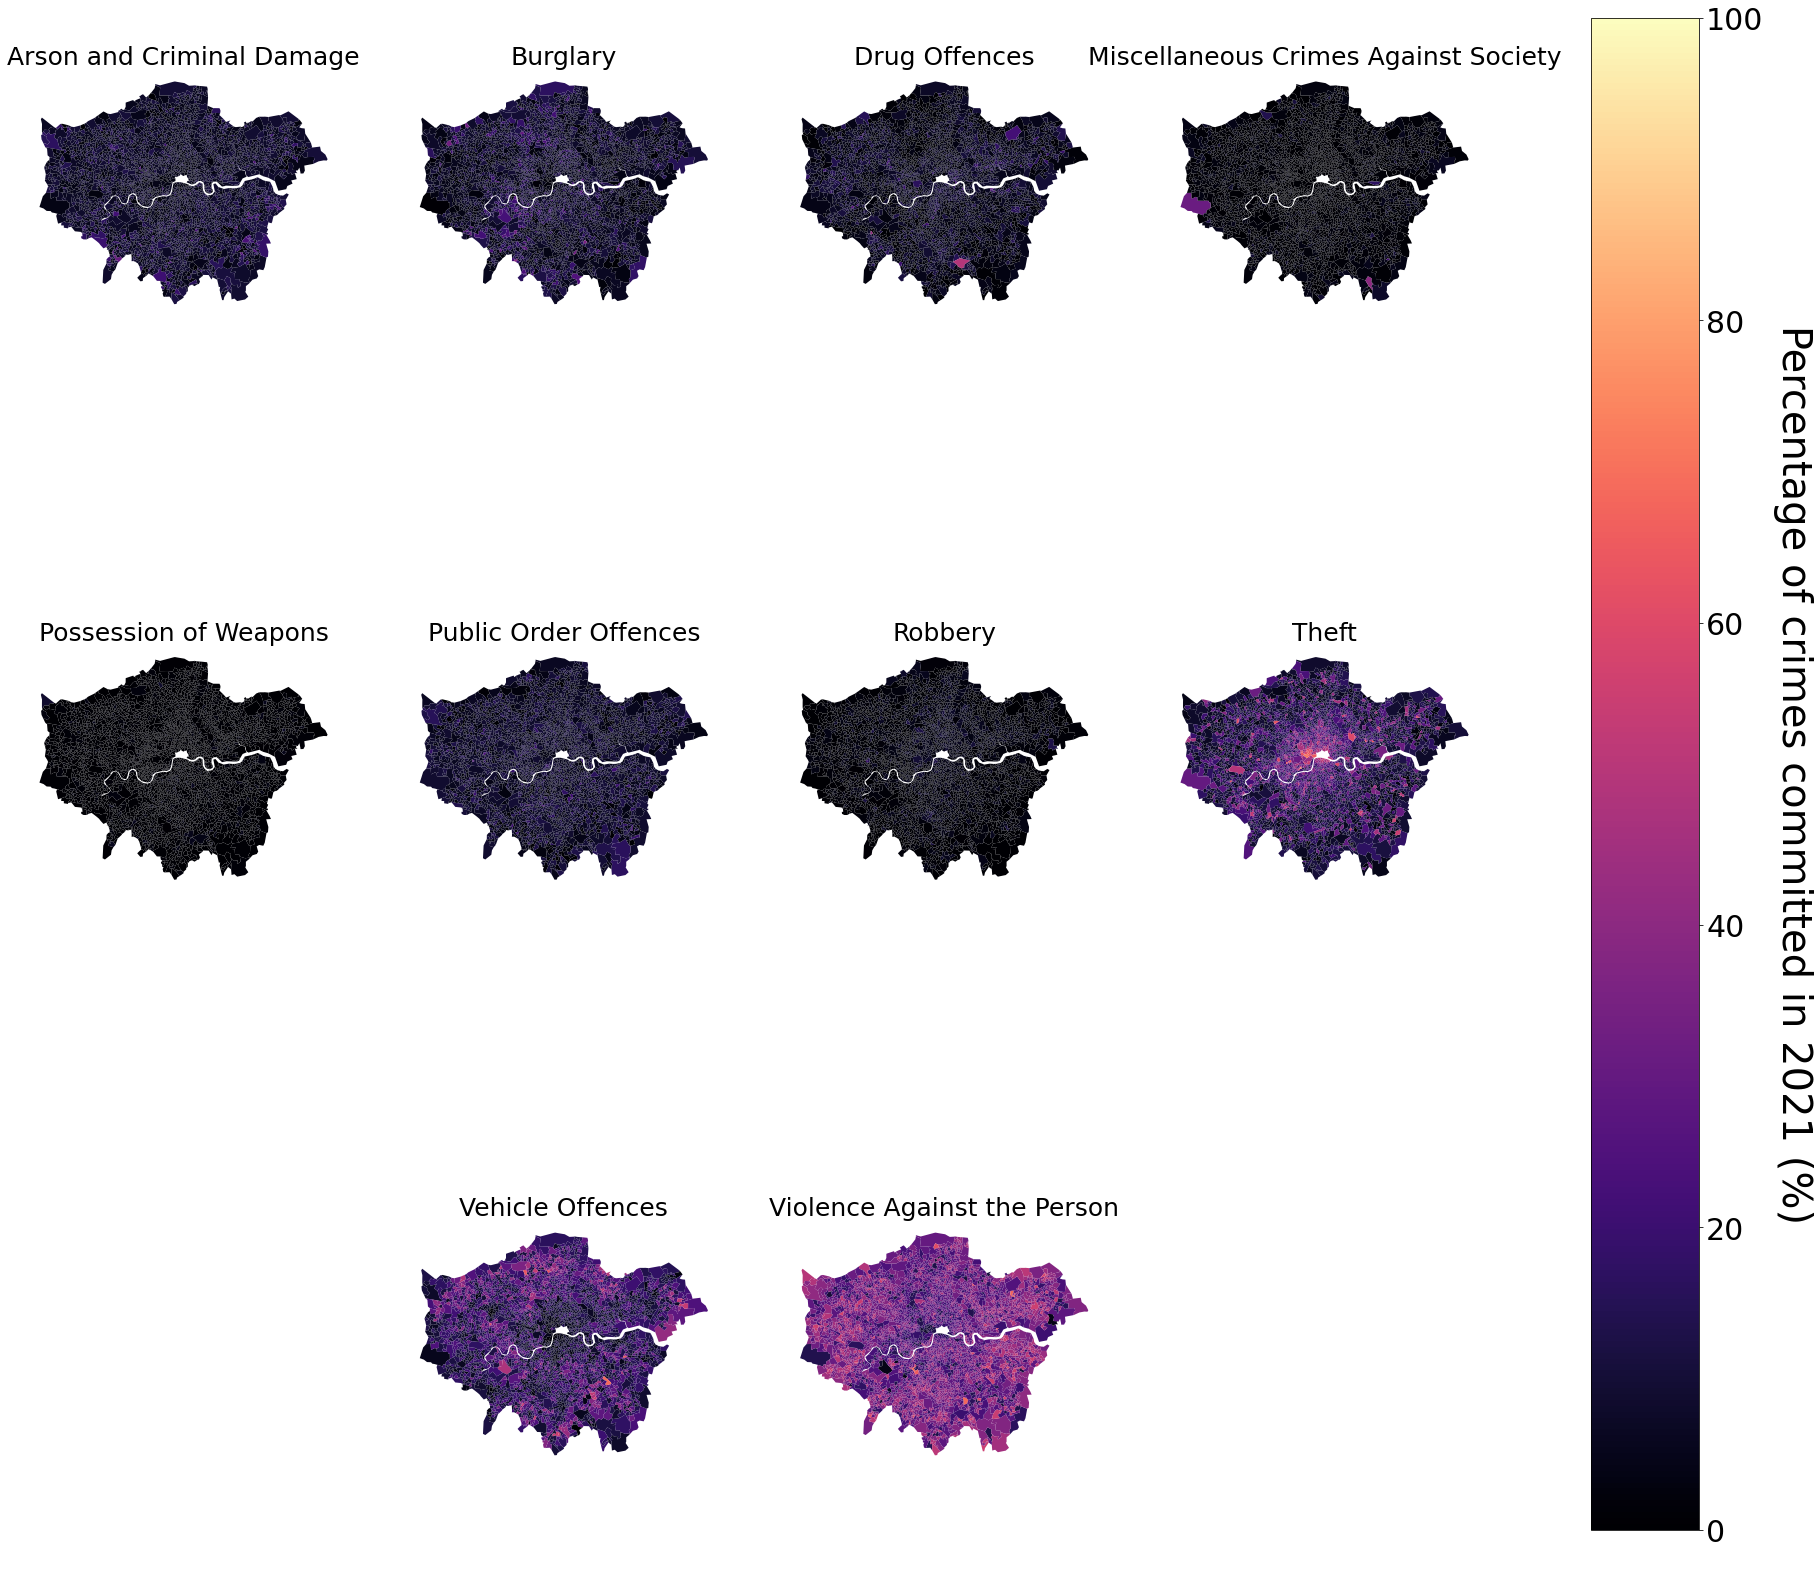

In [21]:
# we then want to map the result

# extract the columns that we don't want to plot
not_plot = ["LSOA11CD", "geometry", "LSOA Code", "Total_crime"]

# use this to extract the columns that we do want to plot
to_plot = [col for col in London_crime.columns if col not in not_plot]

# create a subplot axis, given that we have 10 different categories this has to be a 3 by 4 matrix of plots
fig, axis = plt.subplots(3, 4, figsize=(30, 30))

# flatten the axis so that we can iterate over them
axis = axis.flatten()

# creating the plot function
# use the enumerate to get the value and its index
ax = None
for i, col in enumerate(to_plot):
    # set the axis as in the rows
    ax = axis[i]

    # to make it cleaner move two axis across
    if i >= 8:
        ax = axis[i + 1]

    # plot the crime map using the magma color map
    crim_plt = London_crime.plot(column=col, ax=ax, cmap="magma", vmin=0, vmax=1)

    # remove the axis so that it looks cleaner
    ax.set_axis_off()

    # set the plot title as the column name
    ax.set_title(col, fontsize=25)

# adding a color bar for the overall plto
vmin, vmax = 0, 100

# create a subaxis within the figure
fig = ax.get_figure()
plt.subplots_adjust(right=0.8)
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7], label="Percentage of crime")

# create a colorbar and plot it
sm = plt.cm.ScalarMappable(cmap='magma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cb = fig.colorbar(sm, cax=cax)

# change the size of the tick parameters
cb.ax.tick_params(labelsize=30)

# set the label title
cb.set_label("Percentage of crimes committed in 2021 (%)", rotation=270, fontsize=40, labelpad=50)
#
# cax.tight_layout()

# remove axis of plots not covered
axis[8].set_axis_off()
axis[11].set_axis_off()

# show the results
plt.show()

In [22]:
# import the necessary module
from sklearn.cluster import AgglomerativeClustering

In [23]:
# extract the values that we want to plot
crime_clus = London_crime[to_plot]

In [24]:
# create the model that we want, setting the linkage to ward, the distance threshold to 4 and
# set the number of clusters to none so that we can plot the dendrogram afterwards
model = AgglomerativeClustering(linkage="ward", distance_threshold=4.3, n_clusters=None)

# fit the model to the data
model.fit(crime_clus)

AgglomerativeClustering(distance_threshold=4.3, n_clusters=None)

In [25]:
London_crime["Aggl_clus"] = model.labels_

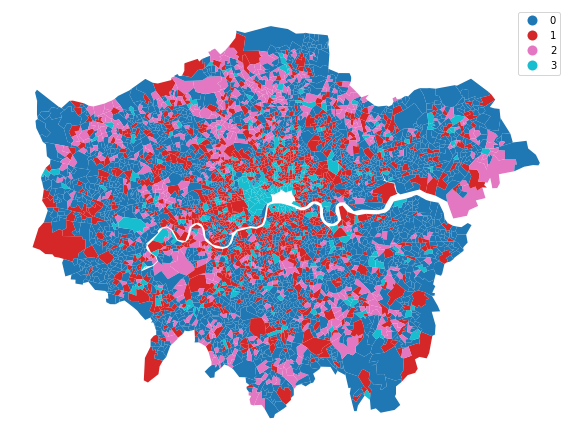

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))

London_crime.plot(column="Aggl_clus", categorical=True, legend=True, ax=ax)

ax.set_axis_off()

In [27]:
agglom_means = London_crime.groupby("Aggl_clus")[to_plot].mean()
agglom_means_T = agglom_means.T.round(3)

agglom_means_T = pd.DataFrame(agglom_means_T)
agglom_means_T

Aggl_clus,0,1,2,3
Arson and Criminal Damage,0.084,0.069,0.071,0.049
Burglary,0.074,0.082,0.114,0.059
Drug Offences,0.056,0.064,0.038,0.045
Miscellaneous Crimes Against Society,0.018,0.013,0.014,0.009
Possession of Weapons,0.008,0.008,0.005,0.006
Public Order Offences,0.076,0.083,0.061,0.073
Robbery,0.022,0.031,0.018,0.035
Theft,0.117,0.247,0.103,0.439
Vehicle Offences,0.154,0.134,0.323,0.089
Violence Against the Person,0.391,0.271,0.252,0.197


In [28]:
agglom_means_T

Aggl_clus,0,1,2,3
Arson and Criminal Damage,0.084,0.069,0.071,0.049
Burglary,0.074,0.082,0.114,0.059
Drug Offences,0.056,0.064,0.038,0.045
Miscellaneous Crimes Against Society,0.018,0.013,0.014,0.009
Possession of Weapons,0.008,0.008,0.005,0.006
Public Order Offences,0.076,0.083,0.061,0.073
Robbery,0.022,0.031,0.018,0.035
Theft,0.117,0.247,0.103,0.439
Vehicle Offences,0.154,0.134,0.323,0.089
Violence Against the Person,0.391,0.271,0.252,0.197


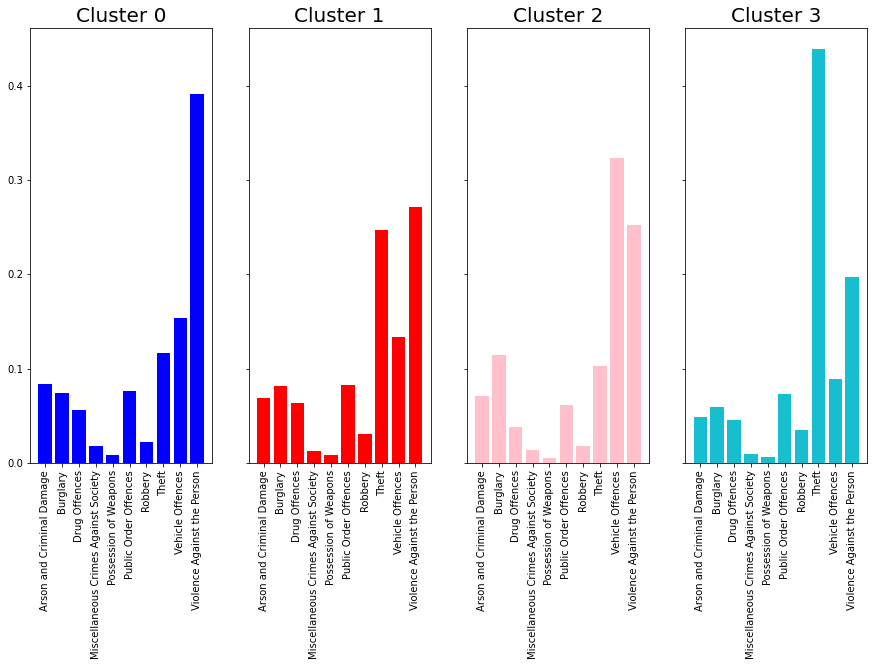

In [29]:
import warnings
warnings.filterwarnings("ignore")

agglom_means_T.reset_index(inplace=True)

# get the colours
colors = ["blue", "red", "pink", "tab:cyan"]

# create subplots for each cluster
_fig, ax = plt.subplots(1, 4, figsize=(15, 8), sharey=True, sharex=True)

# flatten the axis
axis = ax.flatten()

# going over each column
for i, col in enumerate(agglom_means_T.columns):
    # ignore the index column
    if col == "index":
        continue

    ax = axis[i - 1]

    # plot the bar chart
    ax.bar(height=agglom_means_T[col], x=agglom_means_T["index"], color=colors[i - 1])

    # rotate the x-ticks
    ax.set_xticklabels(labels=agglom_means_T["index"], rotation=90)

    # set the title
    ax.set_title(f"Cluster {col}", fontsize=20)

In [30]:
agglom_sizes = London_crime.groupby("Aggl_clus").size()
agglom_sizes

Aggl_clus
0    2610
1    1207
2     663
3     349
dtype: int64

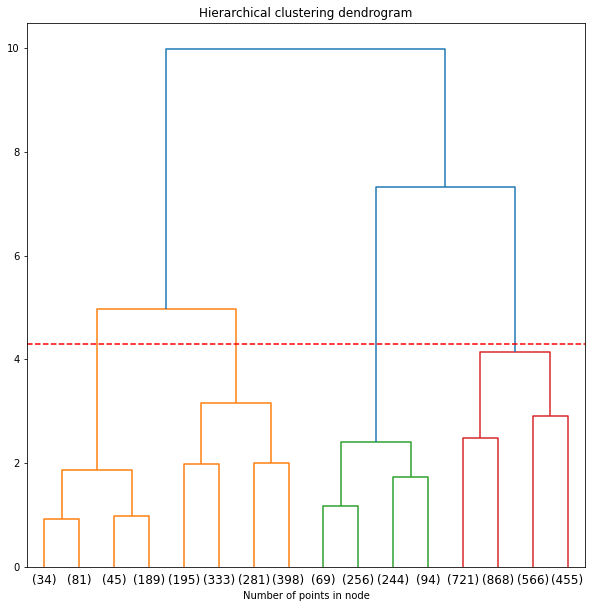

In [31]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0

        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
                continue
            current_count += counts[child_idx - n_samples]

        counts[i] = current_count

    linkage_matrix = np.column_stack([
        model.children_,
        model.distances_,
        counts
    ]).astype(float)

    dendrogram(linkage_matrix, **kwargs)


fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Hierarchical clustering dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.axhline(y=4.3, color="r", linestyle="--")
ax.set_xlabel("Number of points in node")
plt.show()

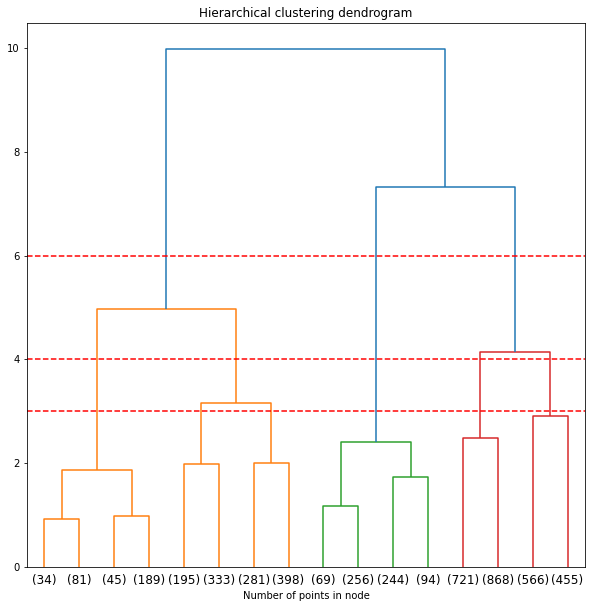

In [32]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0

        for child_idx in merge:
            if child_idx < n_samples:
                current_count +=1
                continue
            current_count += counts[child_idx-n_samples]

        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                     counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

_fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Hierarchical clustering dendrogram")
#plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.axhline(y = 4, color = "r", linestyle = "--")
plt.axhline(y = 6, color = "r", linestyle = "--")
plt.axhline(y = 3, color = "r", linestyle = "--")
ax.set_xlabel("Number of points in node")
plt.show()


In [33]:
# create the model that we want, setting the linkage to ward, the distance threshold to 4 and
# set the number of clusters to none so that we can plot the dendrogram afterwards
model6 = AgglomerativeClustering(linkage="ward", distance_threshold=6, n_clusters=None)

# fit the model to the data
model6.fit(crime_clus)

AgglomerativeClustering(distance_threshold=6, n_clusters=None)

In [34]:
London_crime["Aggl_clus_6"] = model6.labels_

In [35]:
# create the model that we want, setting the linkage to ward, the distance threshold to 3 and
# set the number of clusters to none so that we can plot the dendrogram afterwards
model3 = AgglomerativeClustering(linkage="ward", distance_threshold=3, n_clusters=None)

# fit the model to the data
model3.fit(crime_clus)

AgglomerativeClustering(distance_threshold=3, n_clusters=None)

In [36]:
London_crime["Aggl_clus_3"] = model3.labels_

Text(0.5, 1.0, 'Distance threshold 3 cluster')

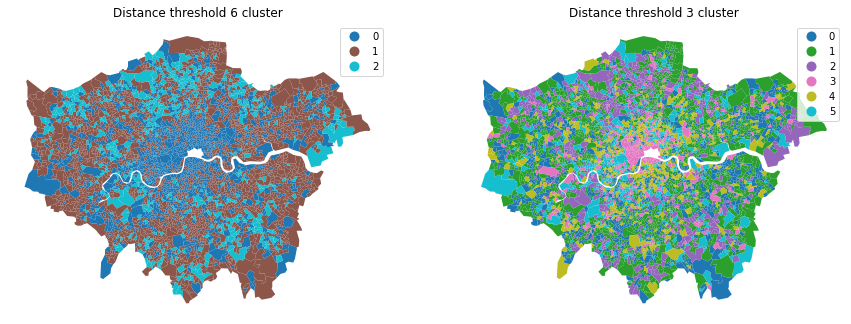

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(15, 30))

London_crime.plot(column="Aggl_clus_6", categorical=True, legend=True, ax=ax[0])
ax[0].set_axis_off()
ax[0].set_title("Distance threshold 6 cluster")

London_crime.plot(column="Aggl_clus_3", categorical=True, legend=True, ax=ax[1])
ax[1].set_axis_off()
ax[1].set_title("Distance threshold 3 cluster")

Text(0.5, 0.98, 'Clusters with distance threshold 6')

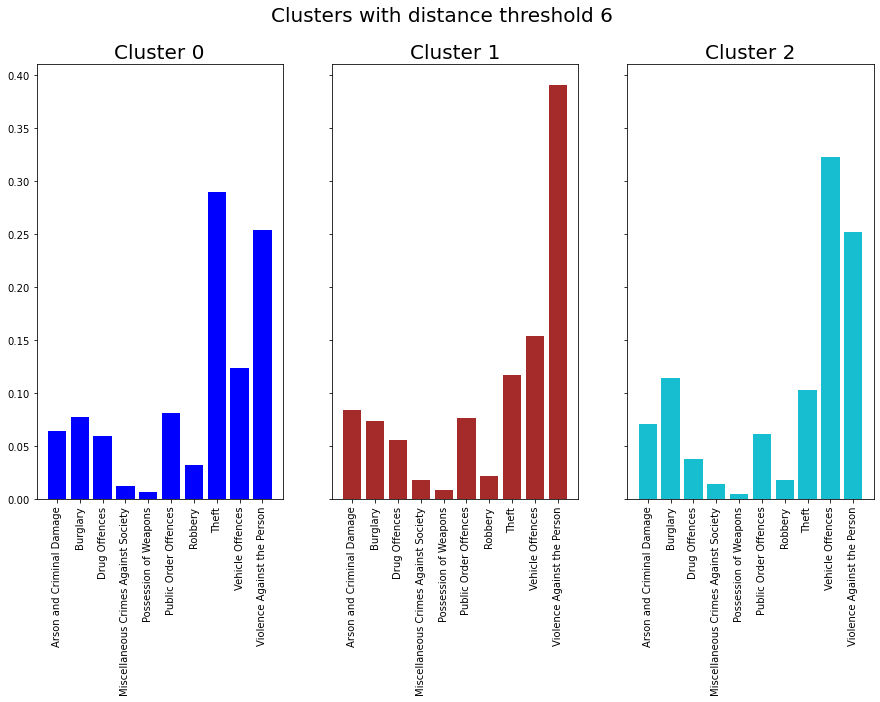

In [38]:
import warnings
warnings.filterwarnings("ignore")

agglom_means = London_crime.groupby("Aggl_clus_6")[to_plot].mean()
agglom_means_T = agglom_means.T.round(3)

agglom_means_T = pd.DataFrame(agglom_means_T)

agglom_means_T.reset_index(inplace=True)

colors = ["blue", "brown", "tab:cyan"]

fig, ax = plt.subplots(1, 3, figsize=(15, 8), sharey=True, sharex=True)
axis = ax.flatten()
for i, col in enumerate(agglom_means_T.columns):
    if col == 'index':
        continue

    ax = axis[i - 1]
    ax.bar(height=agglom_means_T[col], x=agglom_means_T["index"], color=colors[i - 1])
    ax.set_xticklabels(labels=agglom_means_T["index"], rotation=90)
    ax.set_title(f"Cluster {col}", fontsize=20)

plt.suptitle("Clusters with distance threshold 6", fontsize=20)

In [39]:
agglom_sizes = London_crime.groupby("Aggl_clus_6").size()
agglom_sizes

Aggl_clus_6
0    1556
1    2610
2     663
dtype: int64

Text(0.5, 0.98, 'Clusters with distance threshold 3')

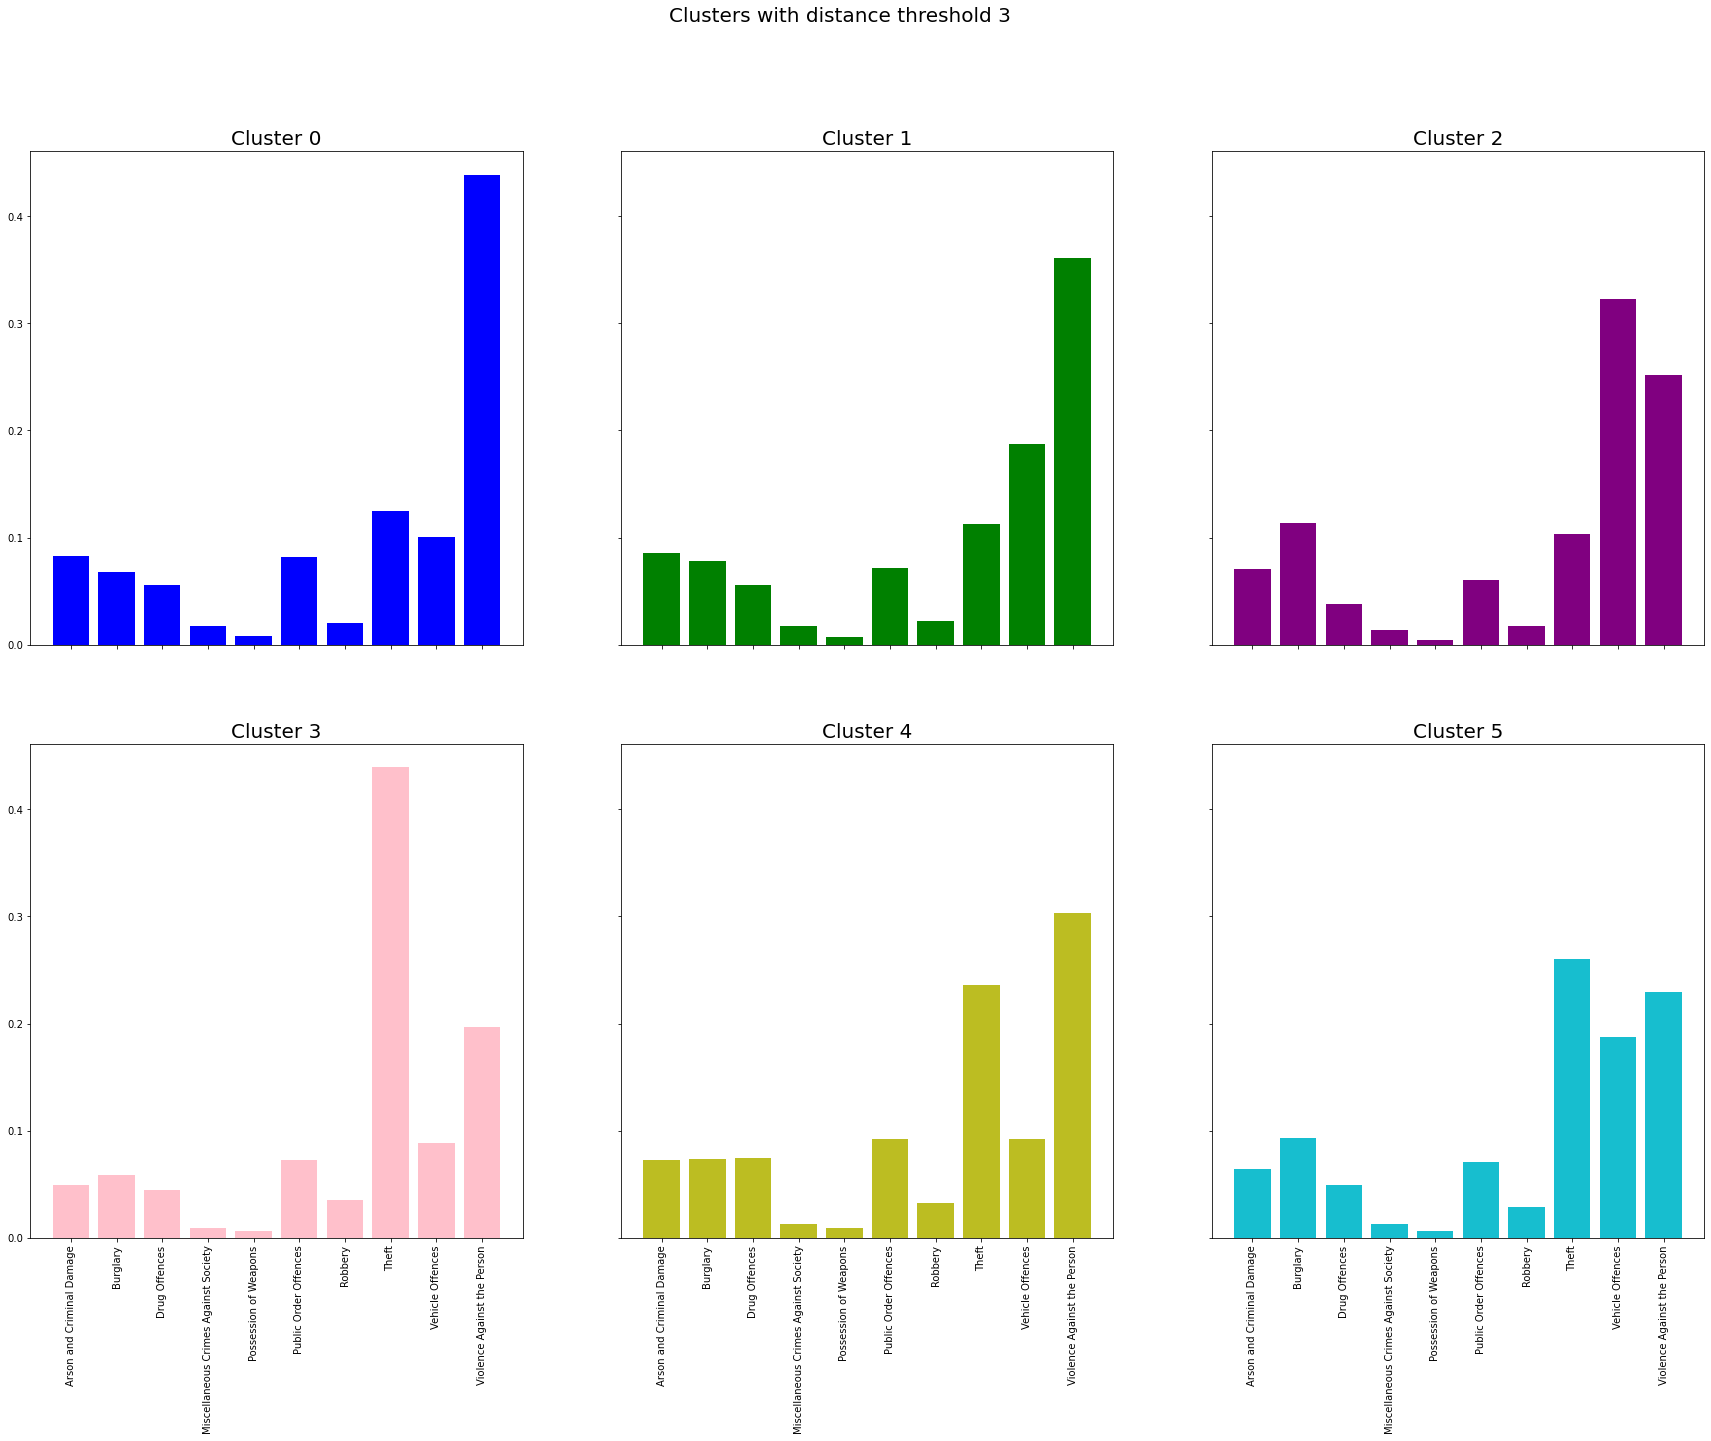

In [40]:
import warnings
warnings.filterwarnings("ignore")

agglom_means = London_crime.groupby("Aggl_clus_3")[to_plot].mean()
agglom_means_T = agglom_means.T.round(3)

agglom_means_T = pd.DataFrame(agglom_means_T)

agglom_means_T.reset_index(inplace=True)

colors = ["blue", "green", "purple", "pink", "tab:olive", "tab:cyan"]

fig, ax = plt.subplots(2, 3, figsize=(30, 20), sharey=True, sharex=True)
axis = ax.flatten()

for i, col in enumerate(agglom_means_T.columns):
    if col == 'index':
        continue

    ax = axis[i - 1]
    ax.bar(height=agglom_means_T[col], x=agglom_means_T["index"],
           color=colors[i - 1])
    ax.set_xticklabels(labels=agglom_means_T["index"], rotation=90)
    ax.set_title(f"Cluster {col}", fontsize=20)

plt.suptitle("Clusters with distance threshold 3", fontsize=20)

Text(0.5, 1.0, 'Clusters with distance threshold 3')

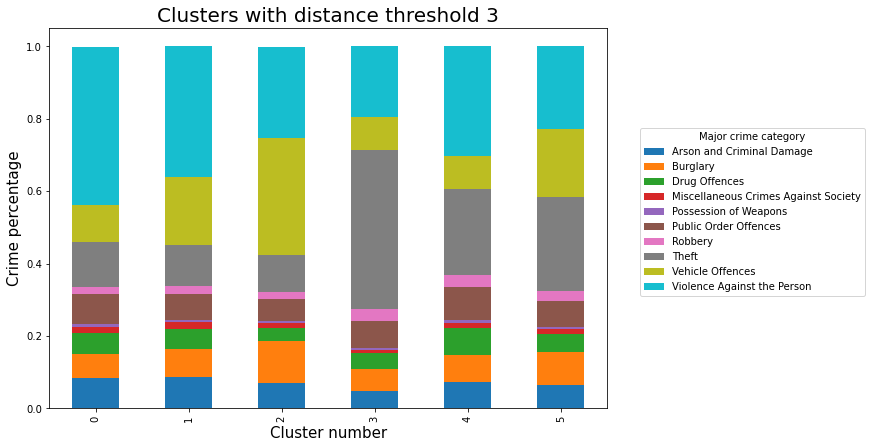

In [41]:
agglom_means = London_crime.groupby("Aggl_clus_3")[to_plot].mean()
agglom_means_T = agglom_means.T.round(3)

agglom_means_T = pd.DataFrame(agglom_means_T)

agglom_means_T.reset_index(inplace=True)

agglom_means_T.set_index('index', inplace=True)
agglom_means_T.rename_axis(None, axis=1, inplace=True)
agglom_means_T.T

fig, ax = plt.subplots(figsize=(10, 10))

agglom_plot = agglom_means_T.T.plot.bar(stacked=True, figsize=(10, 7), ax=ax)
agglom_plot.legend(title='Major crime category', bbox_to_anchor=(1.05, 0.75), loc='upper left')
ax.set_xlabel("Cluster number", fontsize=15)
ax.set_ylabel("Crime percentage", fontsize=15)
ax.set_title("Clusters with distance threshold 3", fontsize=20)

In [42]:
agglom_sizes = London_crime.groupby("Aggl_clus_3").size()
agglom_sizes

Aggl_clus_3
0    1021
1    1589
2     663
3     349
4     679
5     528
dtype: int64

## Spatially constrained hierarchical clustering

In [43]:
# import the necessary packages
from libpysal import weights

# calculate the weights matrix
wr = weights.contiguity.Rook.from_dataframe(London_crime)

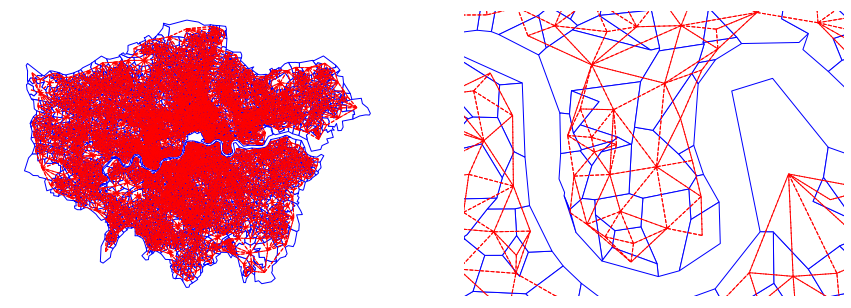

In [44]:
# looking at London
_fig, ax = plt.subplots(1, 2, figsize=(15, 15))

London_crime.plot(edgecolor="blue", facecolor="w", ax=ax[0])

wr.plot(London_crime, ax=ax[0],
        edge_kws=dict(color="r", linestyle="--", linewidth=1),
        node_kws=dict(marker=''))

ax[0].set_axis_off()

# Second plot looking into deepr depth
London_crime.plot(edgecolor="blue", facecolor="w", ax=ax[1])

wr.plot(London_crime, ax=ax[1],
        edge_kws=dict(color="r", linestyle="--", linewidth=1),
        node_kws=dict(marker=''))

# zooming ino Canary Wharf
ax[1].axis([536_000, 540_000, 178_000, 181_000])

ax[1].set_axis_off()

In [45]:
# import Moran
from esda.moran import Moran

#extract the resutls for each column
mi_results = [Moran(London_crime[col], wr) for col in to_plot]

#create a table based on this
#extract the variable, and results from the zipped list
table = pd.DataFrame([(to_plot, res.I, res.p_sim)
                      for to_plot, res
                      in zip(to_plot, mi_results)
                      ],
                     #set the columns
                     columns=['Variable', "Moran's I", 'P-value']).set_index('Variable')

#set the index to the variable
#sort the tables values
table.sort_values(by=["Moran's I"], ascending=False)

,Moran's I,P-value
Variable,,
Vehicle Offences,0.365839,0.001
Theft,0.333222,0.001
Violence Against the Person,0.272171,0.001
Robbery,0.262526,0.001
Drug Offences,0.247696,0.001
Burglary,0.218374,0.001
Arson and Criminal Damage,0.104604,0.001
Public Order Offences,0.079356,0.001
Possession of Weapons,0.063833,0.001


In [46]:
#create the model with wards linkage
model = AgglomerativeClustering(linkage="ward",
                                #define the connectivity
                                connectivity=wr.sparse,
                                #set the distance threshold
                                distance_threshold=2.5,
                                n_clusters=None)

#fit the model
model.fit(crime_clus)

AgglomerativeClustering(connectivity=<4829x4829 sparse matrix of type '<class 'numpy.float64'>'
	with 28016 stored elements in Compressed Sparse Row format>,
                        distance_threshold=2.5, n_clusters=None)

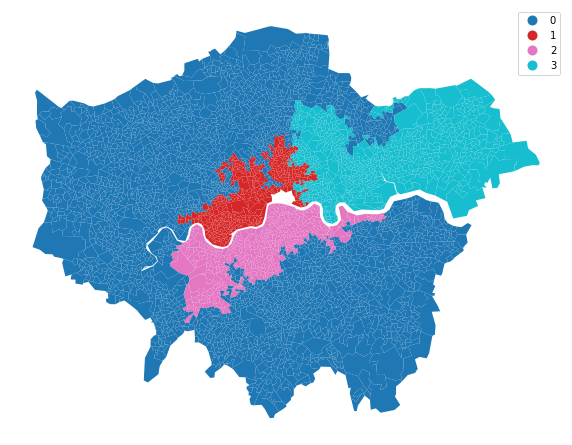

In [47]:
#extract labels
London_crime["Aggl_clus_spa"] = model.labels_

#creating axis
_fig, ax = plt.subplots(figsize=(10, 10))

#plt the results
London_crime.plot(column="Aggl_clus_spa", categorical=True, legend=True, ax=ax)
ax.set_axis_off()

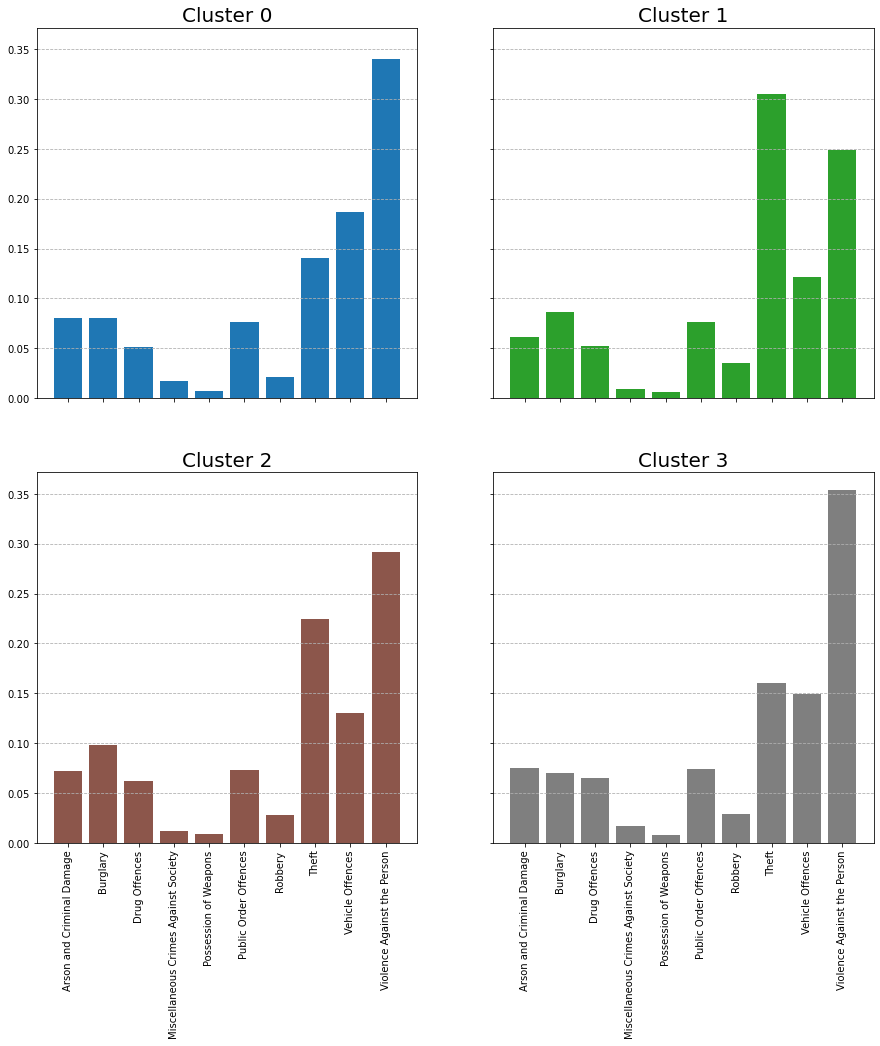

In [48]:
import warnings
warnings.filterwarnings("ignore")

agglom_means = London_crime.groupby("Aggl_clus_spa")[to_plot].mean()

agglom_means_T = pd.DataFrame(agglom_means.T.round(3))

agglom_means_T.reset_index(inplace=True)

colors = ["tab:blue", "tab:green", "tab:brown", "tab:grey", "tab:cyan"]

fig, ax = plt.subplots(2, 2, figsize=(15, 15), sharey=True, sharex=True)
axis = ax.flatten()
for i, col in enumerate(agglom_means_T.columns):
    if col == 'index':
        continue

    ax = axis[i - 1]
    ax.bar(height=agglom_means_T[col], x=agglom_means_T["index"],
           color=colors[i - 1], )
    ax.set_xticklabels(labels=agglom_means_T["index"], rotation=90)
    ax.set_title(f"Cluster {col}", fontsize=20)
    ax.grid(axis="y", zorder=0, linestyle="--")


In [49]:
agglom_sizes = London_crime.groupby("Aggl_clus_spa").size()
agglom_sizes

Aggl_clus_spa
0    2950
1     492
2     557
3     830
dtype: int64

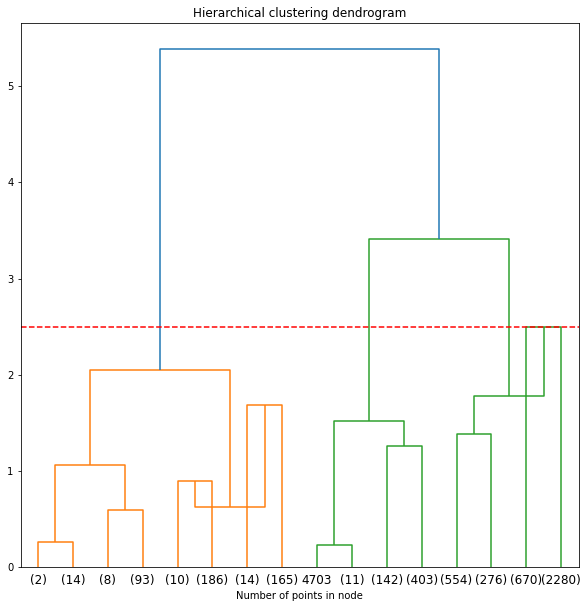

In [50]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0

        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
                continue
            current_count += counts[child_idx - n_samples]

        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)


fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Hierarchical clustering dendrogram")

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)

ax.set_xlabel("Number of points in node")
ax.axhline(y=2.5, color="r", linestyle="--")

plt.show()

References and links:

1) https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d

2) https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/

3) https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

4) https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

5) https://www.saedsayad.com/clustering_hierarchical.htm#:~:text=In%20average%20linkage%20hierarchical%20clustering,point%20in%20the%20other%20cluster.

6) https://data.london.gov.uk/

7) https://geographicdata.science/book/notebooks/04_spatial_weights.html

8) https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering